In [1]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [2]:
import io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud as wc

In [3]:
df = pd.read_csv(io.BytesIO(uploaded['data.csv']),encoding='ISO-8859-1')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13044 entries, 0 to 13168
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13044 non-null  object
 1   HS             13044 non-null  int64 
 2   Abusive        13044 non-null  int64 
 3   HS_Individual  13044 non-null  int64 
 4   HS_Group       13044 non-null  int64 
 5   HS_Religion    13044 non-null  int64 
 6   HS_Race        13044 non-null  int64 
 7   HS_Physical    13044 non-null  int64 
 8   HS_Gender      13044 non-null  int64 
 9   HS_Other       13044 non-null  int64 
 10  HS_Weak        13044 non-null  int64 
 11  HS_Moderate    13044 non-null  int64 
 12  HS_Strong      13044 non-null  int64 
 13  total_char     13044 non-null  int64 
 14  total_word     13044 non-null  int64 
dtypes: int64(14), object(1)
memory usage: 1.6+ MB


In [14]:
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138,25
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120,21
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254,37
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75,14
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89,14


In [ ]:
df.tail()

In [9]:
df.shape

(13169, 13)

In [10]:
df.duplicated().sum()

125

In [6]:
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

In [ ]:
df.isna()

In [ ]:
df.isna().sum()/df.shape[0]

In [10]:
df['total_char'] = df.Tweet.apply(len)

In [11]:
df['total_word'] = df.Tweet.apply(lambda sent: len(sent.split()))

In [ ]:
df.head()

In [ ]:
df.mean()

In [ ]:
df.median()

In [20]:
df['Abusive'].mode()

0    0
Name: Abusive, dtype: int64

In [21]:
df['total_char'].mode()

0    254
Name: total_char, dtype: int64

In [22]:
df['total_word'].mode()

0    11
Name: total_word, dtype: int64

In [23]:
range_total_word = df.total_word.max() - df.total_word.min()
range_total_word

51

In [24]:
range_total_char = df.total_char.max() - df.total_char.min()
range_total_char

557

In [25]:
p0 = df.total_char.min()

p100 = df.total_char.max()

q1 = df.total_char.quantile(0.25)

q2 = df.total_char.quantile(0.5)

q3 = df.total_char.quantile(0.75)

iqr = q3-q1

lower_limit = q1-1.5*iqr

upper_limit = q3+1.5*iqr

print("Batas Bawah 'total_char':", lower_limit)
print("Nilai minimum", p0)

if lower_limit < p0:
  print("Tidak ada outlier dari sisi batas bawah")
else:
  print("Ada outlier dari sisi atas bawah")

print()
print("Batas Atas 'total_char':", upper_limit)
print("Nilai Maksimum", p100)

if upper_limit > p100:
  print("Tidak ada outlier dari sisi batas atas")
else:
  print("Ada outlier dari sisi batas atas")

Batas Bawah 'total_char': -80.5
Nilai minimum 4
Tidak ada outlier dari sisi batas bawah

Batas Atas 'total_char': 291.5
Nilai Maksimum 561
Ada outlier dari sisi batas atas


In [26]:
print("mean total char: ",df.total_char.mean())
print("var total char: ",df.total_char.var())
print("std total char: ",df.total_char.std())

mean total char:  114.12434835939895
var total char:  4775.035061485935
std total char:  69.10162850096903


In [27]:
print("mean total word: ",df.total_word.mean())
print("var total word: ",df.total_word.var())
print("std total word: ",df.total_word.std())

mean total word:  17.264259429622815
var total word:  104.91053421345475
std total word:  10.24258435227432


In [ ]:
df.describe()

In [ ]:
df.mean()

In [ ]:
df.var()

In [ ]:
df.std()

In [ ]:
df.skew()

In [ ]:
df.kurtosis()

In [ ]:
sns.boxplot(x=df["total_char"])

<Axes: >

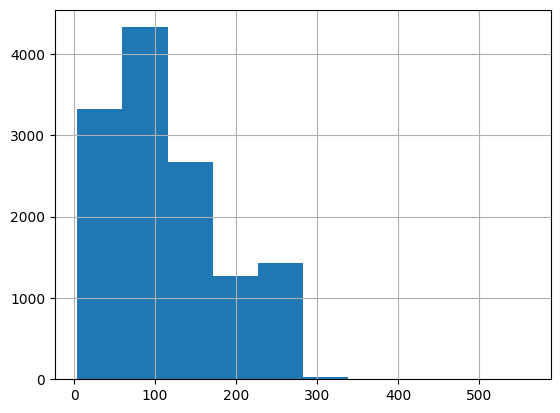

In [35]:
df.total_char.hist()

<Axes: >

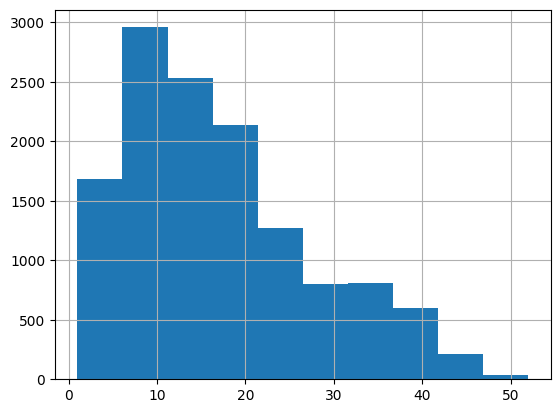

In [36]:
df.total_word.hist()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13044 entries, 0 to 13168
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13044 non-null  object
 1   HS             13044 non-null  int64 
 2   Abusive        13044 non-null  int64 
 3   HS_Individual  13044 non-null  int64 
 4   HS_Group       13044 non-null  int64 
 5   HS_Religion    13044 non-null  int64 
 6   HS_Race        13044 non-null  int64 
 7   HS_Physical    13044 non-null  int64 
 8   HS_Gender      13044 non-null  int64 
 9   HS_Other       13044 non-null  int64 
 10  HS_Weak        13044 non-null  int64 
 11  HS_Moderate    13044 non-null  int64 
 12  HS_Strong      13044 non-null  int64 
 13  total_char     13044 non-null  int64 
 14  total_word     13044 non-null  int64 
dtypes: int64(14), object(1)
memory usage: 1.6+ MB


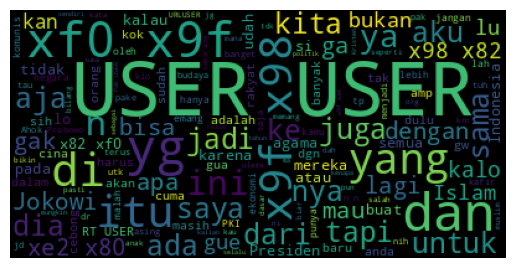

In [38]:
from wordcloud import WordCloud
text = ''.join(df['Tweet'])
wordcloud = WordCloud().generate(text)

#Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

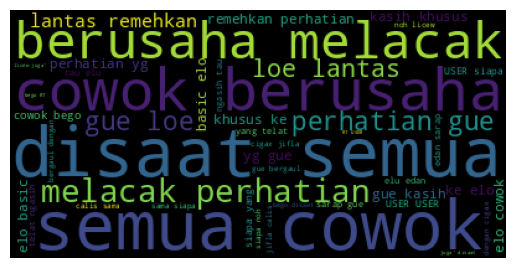

In [39]:
from wordcloud import WordCloud
df_HS = df.loc[df['HS']]

text = ''.join(df_HS['Tweet'])
wordcloud = WordCloud().generate(text)

#Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

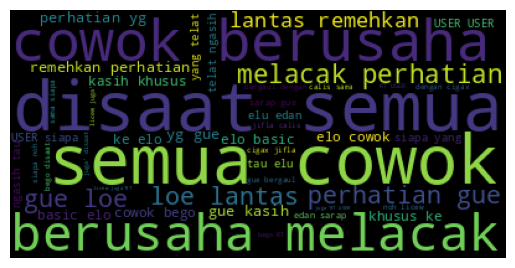

In [40]:
from wordcloud import WordCloud
df_Abusive = df.loc[df['Abusive']]

text = ''.join(df_Abusive['Tweet'])
wordcloud = WordCloud().generate(text)

#Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

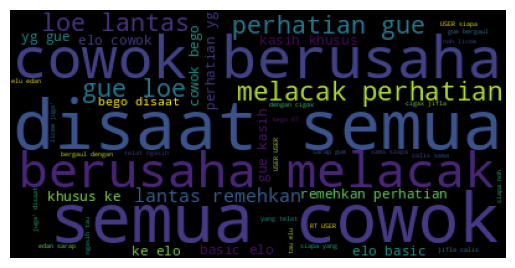

In [26]:
from wordcloud import WordCloud
df_HS_Religion = df.loc[df['HS_Religion']]

text = ''.join(df_HS_Religion['Tweet'])
wordcloud = WordCloud().generate(text)

#Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

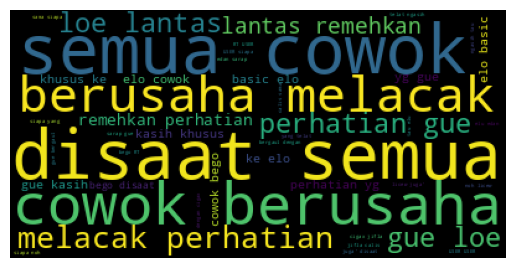

In [41]:
from wordcloud import WordCloud
df_HS_Race = df.loc[df['HS_Race']]

text = ''.join(df_HS_Race['Tweet'])
wordcloud = WordCloud().generate(text)

#Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()